In [2]:
# small network
import torch.nn as nn


class discriminator(nn.Module):
    def __init__(self,input_size):
        super(discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, int(input_size/4)),
            nn.LeakyReLU(0.2),
            nn.Linear(int(input_size/4), 1),
            nn.Sigmoid()
        )
    def forward(self, input):
        return self.main(input)
class generator(nn.Module):
    def __init__(self,output_size):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(4, int(input_size/4)),
            nn.ReLU(),
            nn.Linear(int(input_size/4), output_size),
        )

    def forward(self, input):
        return self.main(input)
    


In [3]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
#from model import discriminator, generator
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Discriminator Loss => BCELoss
# abides with comp9417 loss, generator emphasis on samples that fails to fool discriminator
def d_loss_function(inputs, targets):
    return nn.BCELoss()(inputs, targets)

def g_loss_function(inputs):
    targets = torch.ones([inputs.shape[0], 1])
    targets = targets.to(device)
    return nn.BCELoss()(inputs, targets)

In [5]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

# Model
G = generator().to(device)
D = discriminator().to(device)
print(G)
print(D)

# Settings
epochs = 200
lr = 0.0002
batch_size = 16
#g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
#d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

g_optimizer = optim.SGD(G.parameters(), lr=lr)
d_optimizer = optim.SGD(D.parameters(), lr=lr)

GPU State: cpu


TypeError: __init__() missing 1 required positional argument: 'output_size'


0 torch.Size([64, 1, 28, 28]) torch.Size([64]) None
torch.Size([64, 128])


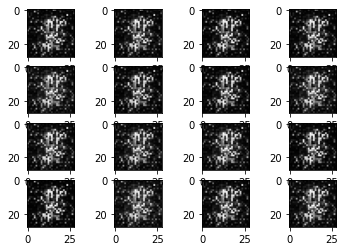

Training Finished.


In [24]:
# Train
for epoch in range(epochs):
    epoch += 1

    for times, data in enumerate(train_loader):
        #print(times,data[0].shape,data[1].shape,print())
        times += 1
        real_inputs = data[0].to(device)
        test = 255 * (0.5 * real_inputs[0] + 0.5)

        real_inputs = real_inputs.view(-1, 784)
        real_outputs = D(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)

        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        #print(noise.shape)
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)

        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)

        # Zero the parameter gradients
        d_optimizer.zero_grad()

        # Backward propagation
        d_loss = d_loss_function(outputs, targets)
        d_loss.backward()
        d_optimizer.step()

        # Generator
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)

        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)

        g_loss = g_loss_function(fake_outputs)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if times % 100 == 0 or times == len(train_loader):
            print('[{}/{}, {}/{}] D_loss: {:.3f} G_loss: {:.3f}'.format(epoch, epochs, times, len(train_loader), d_loss.item(), g_loss.item()))
        #break
    imgs_numpy = (fake_inputs.data.cpu().numpy()+1.0)/2.0
    show_images(imgs_numpy[:16])
    plt.show()

    if epoch % 50 == 0:
        torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        print('Model saved.')


print('Training Finished.')
#print('Cost Time: {}s'.format(time.time()-start_time))

In [11]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )